Тестовое задание cyber punk

In [104]:
import pandas as pd
import numpy as np
from sklearn import model_selection, ensemble, metrics, preprocessing
from scipy import signal

In [105]:
#Загрузка данных
data_0 = pd.read_csv('0.csv', header=None, sep = ',')
data_1 = pd.read_csv('1.csv', header=None, sep = ',')
data_2 = pd.read_csv('2.csv', header=None, sep = ',')
data_3 = pd.read_csv('3.csv', header=None, sep = ',')

In [106]:
data_1.head()
data_1.shape

(2903, 65)

In [107]:
data = pd.concat([data_0, data_1, data_2, data_3])
data.shape

(11678, 65)

In [108]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\novon\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [109]:
X = data.values

In [110]:
y = X[:, 64]
X = X[:, :64]

In [111]:
#Перемешиваем
#Разобьем на train и test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

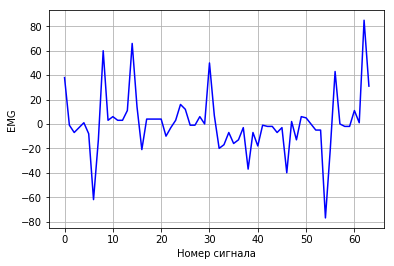

In [112]:
#Построим график
pylab.grid(True)
pylab.plot(list(range(64)), X_train[0, :], 'b-')
pylab.ylabel('EMG')
pylab.xlabel('Номер сигнала')

In [113]:
#Предобработка данных
#Используем MinMaxScaler
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

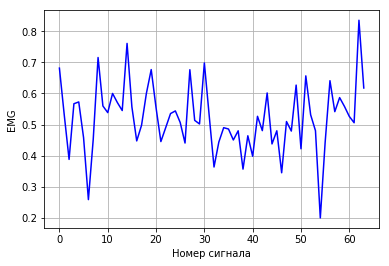

In [114]:
#Построим график
pylab.grid(True)
pylab.plot(list(range(64)), X_train[0, :], 'b-')
pylab.ylabel('EMG')
pylab.xlabel('Номер сигнала')

In [115]:
X_train_med = np.zeros(X_train.shape)
for i in range(X_train.shape[0]):
    X_train_med[i, :] = signal.medfilt(X_train[i, :])

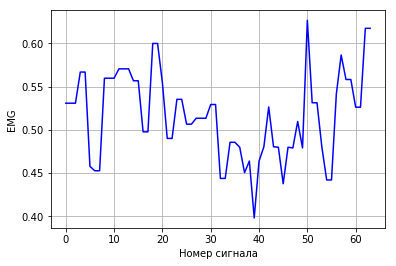

In [116]:
#Построим график
pylab.grid(True)
pylab.plot(list(range(64)), X_train_med[0, :], 'b-')
pylab.ylabel('EMG')
pylab.xlabel('Номер сигнала')

In [117]:
#Обучение RandomForest без фильтра
clf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=50, max_features=1/8)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=0.125, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
#Оценка на тесте
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.916523972603


In [119]:
#Обучение RandomForest с фильтром
clf.fit(X_train_med, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=0.125, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
#Предобработка теста
X_test_med = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_med[i, :] = signal.medfilt(X_test[i, :])

In [122]:
#Оценка на тесте
y_pred = clf.predict(X_test_med)
print(metrics.accuracy_score(y_test, y_pred))

0.832191780822


Я решила использовать RandomForest, т.к. он не оч. долго обучается и его можно распараллелить. Получилось приемлимое качество. Можно еще далее лучше подобрать параметры.

Я решила попробовать применить какой-то preprocessing к данным, помимо scaler. Для начала медианный фильтр. Подумала, что он может убрать бы шумы в данных и качество может улучшиться. Качество получилось значительно хуже. Судя по всему такой фильтр слишком сильный для данного датасета. 

Можно попробовать какие-то другие методы предобработки, но я в рамках выполнения тестового задания не успела достаточно изучить тему и погрузиться в данные.